## EDA analysing the windspeed and winddirection and its effect on the target

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import windrose as wr

In [2]:
# Load dataset
df = pd.read_csv('../data/GEFCom2014Data/Wind/clean_data.csv')

In [3]:
sns.set_theme()

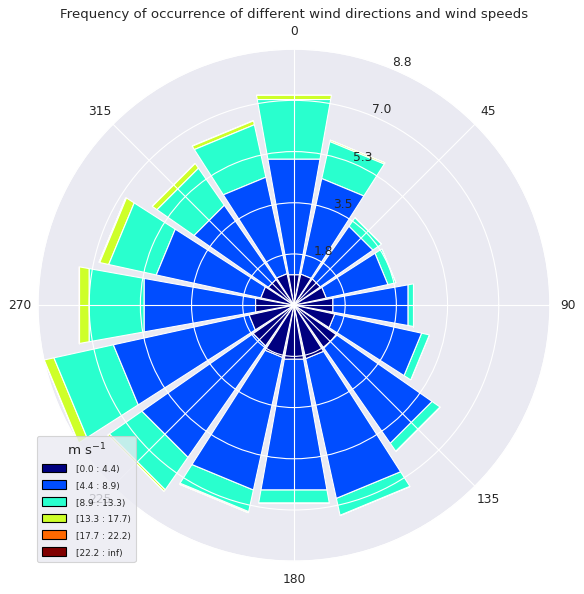

In [4]:
## Create windrose plot: frequency and wind speed by direction
ax = wr.WindroseAxes.from_ax(theta_labels = np.concatenate([np.arange(90,-45,-45),np.arange(315,90,-45)]))
ax.bar(df.WD100, df.WS100, normed = True, opening = .9, edgecolor = 'white')
ax.set_legend(title='$\mathregular{m\ s^{-1}}$')
ax.set_title('Frequency of occurrence of different wind directions and wind speeds')
plt.show()

Analysis by wind direction

In [5]:
# import the dataset without the dammuy variables for ```WD100CARD```
df_card = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data_incl_features.csv')

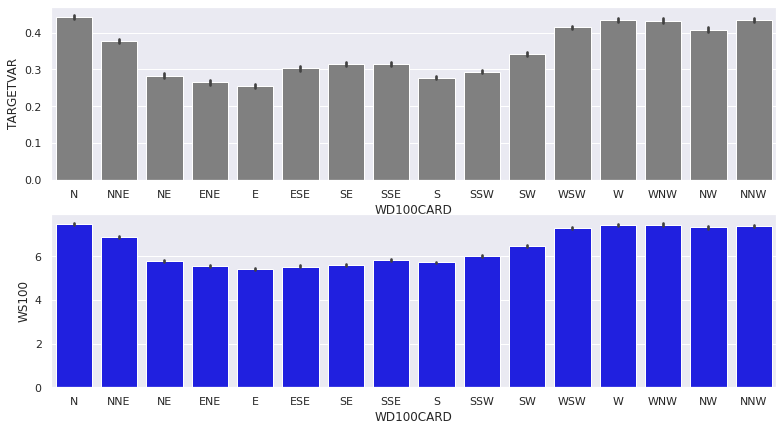

In [6]:
## wind power and wind speed by direction
order = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
fig,ax = plt.subplots(2,1,figsize=(13,7))
sns.barplot(data = df_card, x = 'WD100CARD', y = 'TARGETVAR', order = order, ax=ax[0], color='gray');
sns.barplot(data = df_card, x = 'WD100CARD', y = 'WS100', order = order, ax=ax[1], color='blue');


Energy output by winddirection

In [7]:
df['wd10_rd'] = (df.WD10 // 5) * 5
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,WD10CARD_NW,WD10CARD_S,WD10CARD_SE,WD10CARD_SSE,WD10CARD_SSW,WD10CARD_SW,WD10CARD_W,WD10CARD_WNW,WD10CARD_WSW,wd10_rd
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,1,0,0,0,0,0,0,0,0,320.0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,...,1,0,0,0,0,0,0,0,0,305.0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,...,0,0,0,0,0,0,0,1,0,285.0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,...,0,0,0,0,0,0,1,0,0,270.0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,...,0,0,0,0,0,0,1,0,0,260.0


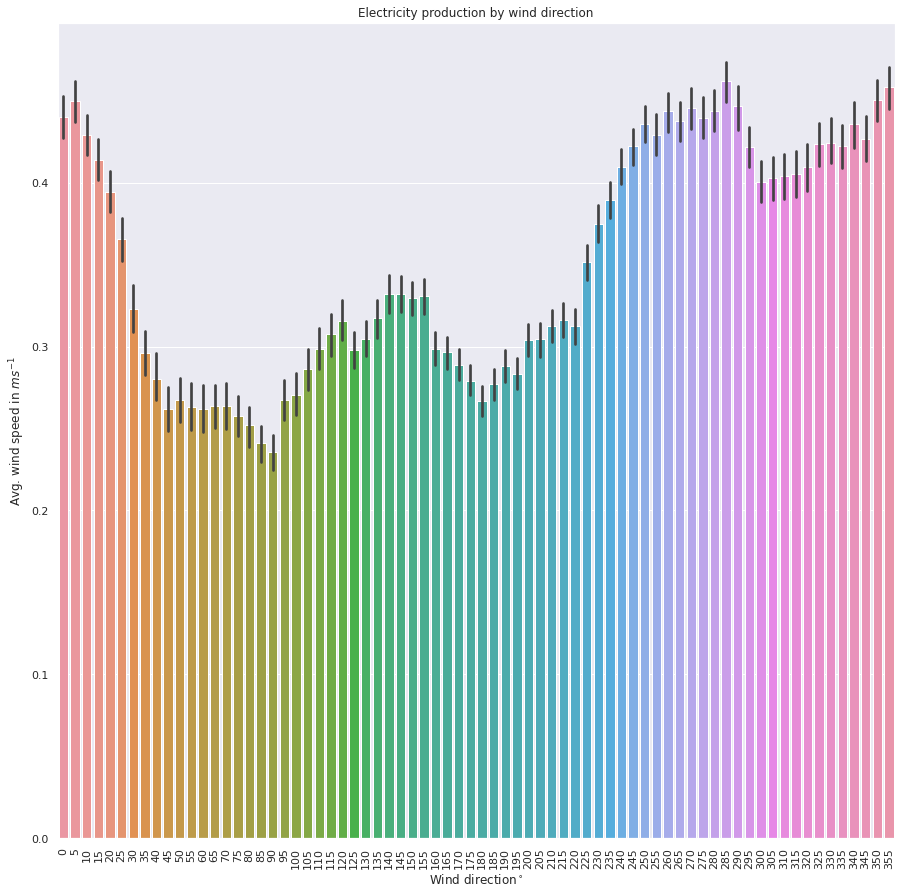

In [8]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.barplot(data = df, x = 'wd10_rd', y = 'TARGETVAR', ax = ax)
ax.set_xticklabels([int(x) for x in sorted(df.wd10_rd.unique())])
plt.xlabel('Wind direction' + r'$^\circ$')
plt.ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
plt.xticks(rotation=90)
plt.title('Electricity production by wind direction')
plt.show()

Energy output vs windspeed at height 100m for all wimdfarms in average

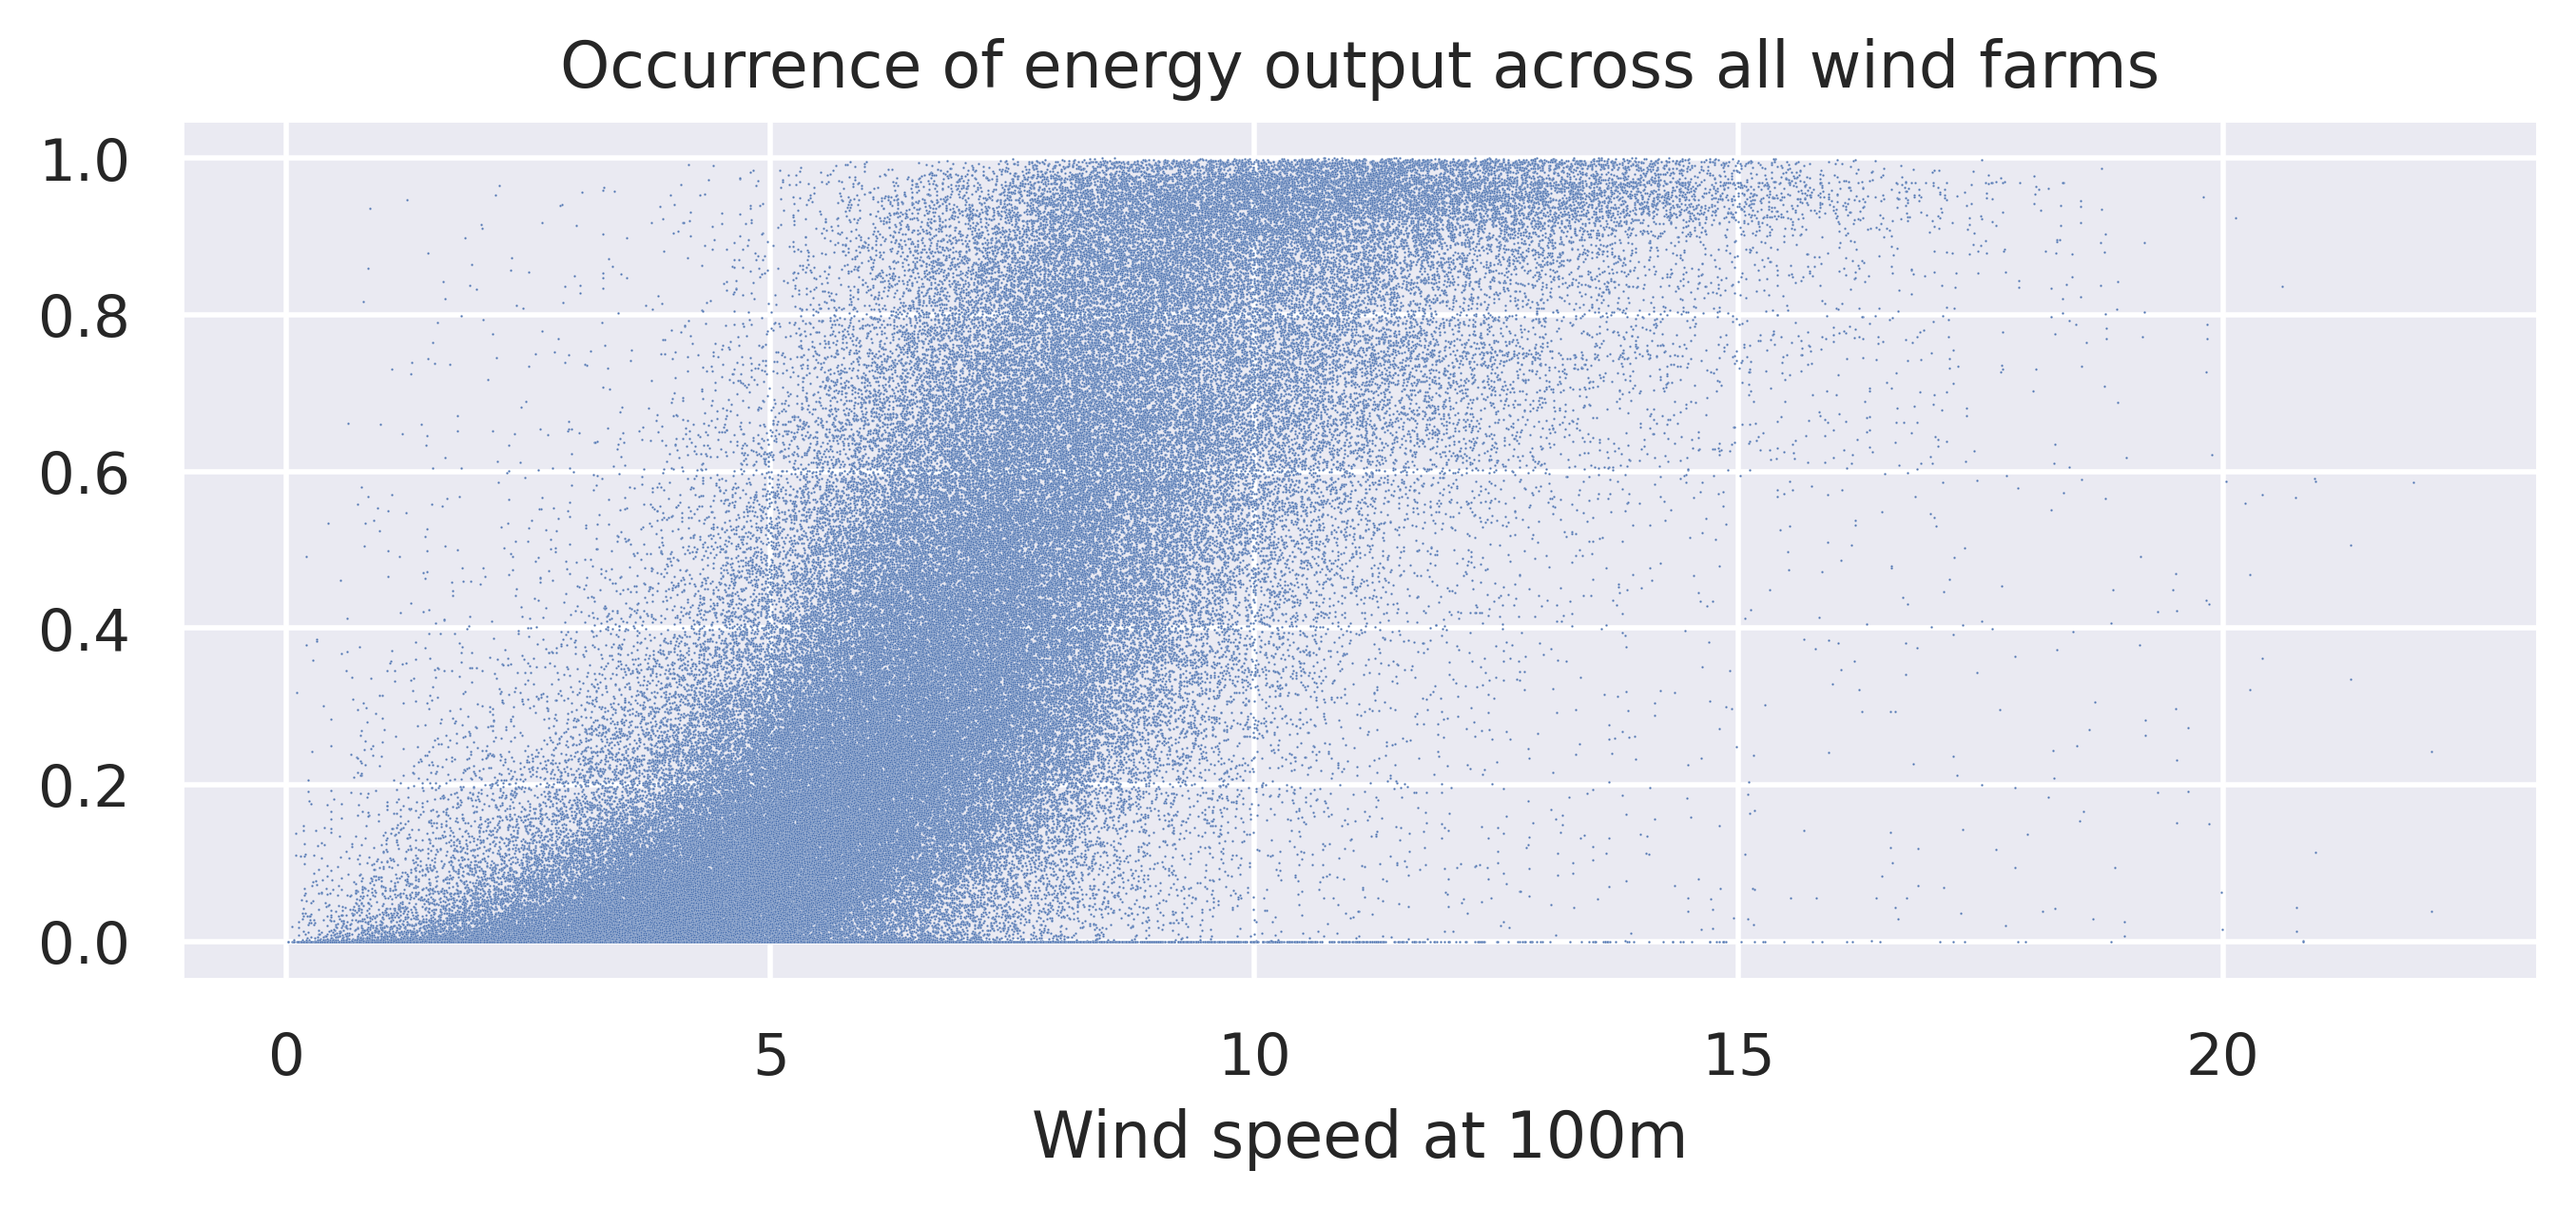

In [12]:
fig, ax = plt.subplots(figsize = (8, 3), dpi = 400)

sns.scatterplot(data = df, x = 'WS100',y = 'TARGETVAR',  ax = ax, s = 0.2,)
ax.set_title('Occurrence of energy output across all wind farms')
ax.set_ylabel('')
y_labels = []
ax.set_xlabel('Wind speed at 100m')
ax.annotate('mean normalized energy output', xy=(0.37, 15), xytext=(0.45, 17),
            arrowprops=dict(arrowstyle = '-',  facecolor='black'))
#plt.axhline(y = df.TARGETVAR.mean())
plt.show()


Energy production vs winspeed at height 100 m

In [13]:
ws_bins = np.arange(df.WS100.min() // 1, (df.WS100.max() + 1) // 1 + 2, 2, dtype = int)

ws_labels = []
for i, bin_ in enumerate(ws_bins):
    if i > len(ws_bins) - 2:
        break
    ws_labels.append(f'{bin_} - {ws_bins[i + 1]}')
    
df['ws100bin'] = pd.cut(df['WS100'], bins=ws_bins, labels=ws_labels)

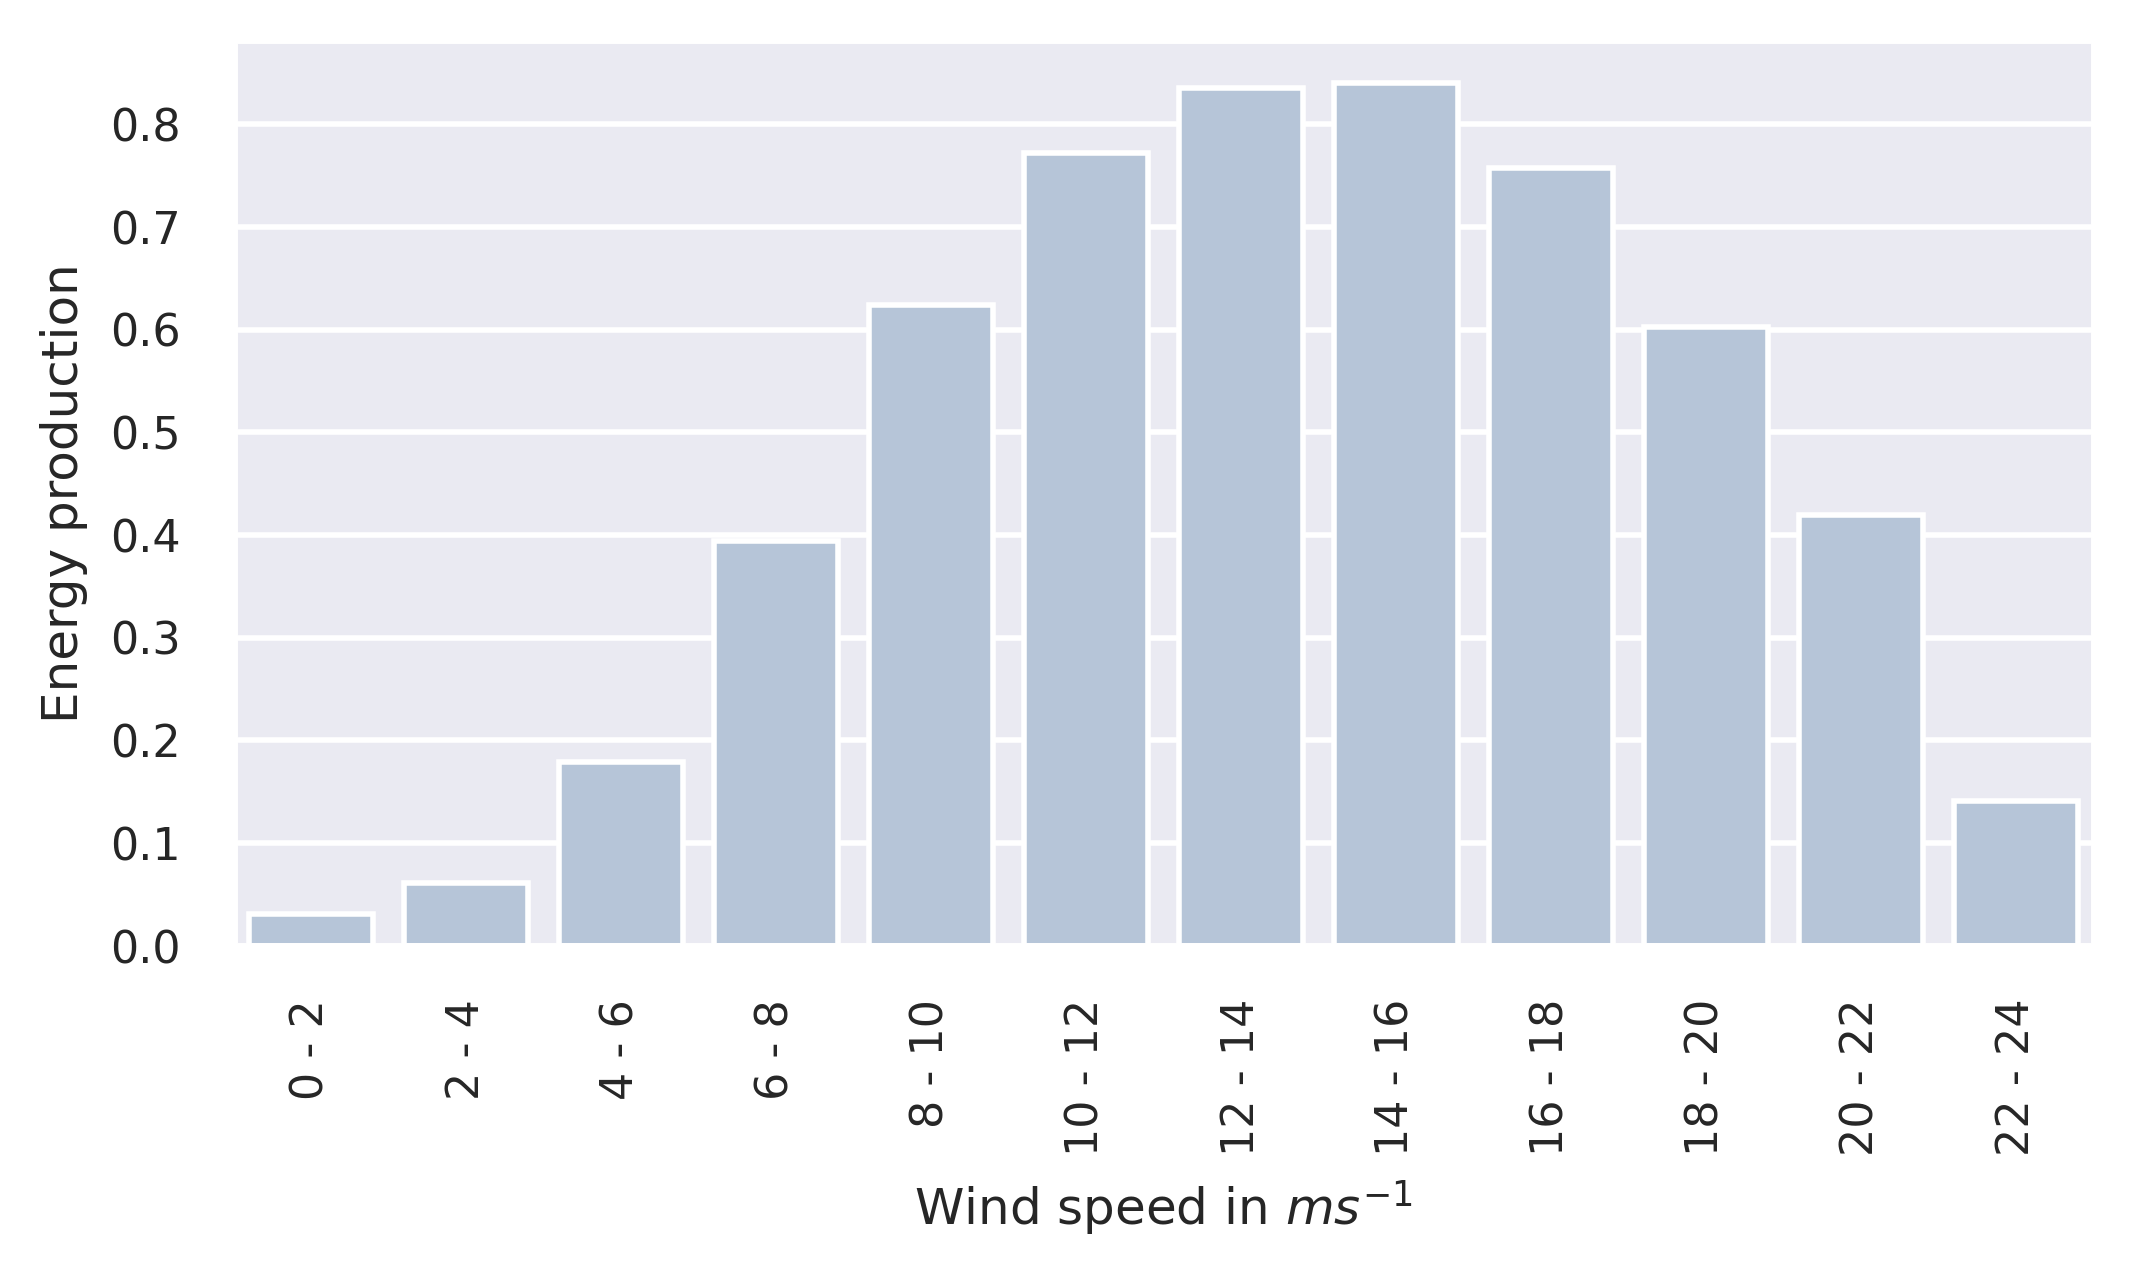

In [15]:
fontsize=8
fig, ax = plt.subplots(figsize = (6, 3), dpi = 400)
sns.barplot(data = df, 
            x = 'ws100bin', 
            y = 'TARGETVAR', 
            ax = ax, 
            order = ws_labels,
            color = 'lightsteelblue',
            ci = None)
ax.tick_params(axis='both', labelsize=fontsize)
plt.xlabel('Wind speed in '+ r'$ms^{-1}$', fontsize = fontsize + 1)
plt.ylabel('Energy production', fontsize = fontsize + 1)
plt.xticks(rotation=90)
#plt.title('Electricity production by wind speed')
plt.show()

There is a high correlation between windspeed and energy production. Windspeed is the most important feature.